In [91]:
import sys, os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from tbparse import SummaryReader
from torch_ac.utils import DictList

In [19]:
def sorted_listdir(path):
    files = sorted((f for f in os.listdir(path) if not f.startswith(".")), key=str.lower)
    return files

In [95]:
args = {}
args = DictList(args)

args.date = '2023-01-19'
args.approach = 'blip'
args.experiment = 'minigrid-tb-blip-5e5-doorkey-wallgap-lavagap-redbluedoor'
args.seed = 1
args.F_prior = 5e-18



if args.approach == 'fine-tuning' or args.approach == 'ft-fix':
    log_name = '{}_{}_{}_{}'.format(args.date, args.experiment, args.approach,args.seed)
elif args.approach == 'ewc' in args.approach:
    log_name = '{}_{}_{}_{}_lamb_{}'.format(args.date, args.experiment, args.approach, args.seed, args.ewc_lambda)
elif args.approach == 'blip':
    log_name = '{}_{}_{}_{}_F_prior_{}'.format(args.date, args.experiment, args.approach, args.seed, args.F_prior)



train_dir = os.path.join("./result_data/", log_name, "train")
event_file = os.path.join(train_dir, sorted_listdir(train_dir)[0])
print(event_file)

./result_data/2023-01-19_minigrid-tb-blip-5e5-doorkey-wallgap-lavagap-redbluedoor_blip_1_F_prior_5e-18/train/events.out.tfevents.1674145242.inigo.home.34278.0


In [96]:
reader = SummaryReader(event_file)
df = reader.scalars
df_mean = df[df['tag'] == 'mean_reward']
df_std = df[df['tag'] == 'std']
df_min = df[df['tag'] == 'min_reward']
df_max = df[df['tag'] == 'max_reward']

In [ ]:
g = sns.lineplot(data=df, x='step', y='mean_reward')
g = sns.lineplot(data=df, x='step', y='std')

g.legend(['mean_reward', 'std'])
g.set(ylabel='value', title='Mean reward')

In [ ]:
ax = sns.lineplot(data=df_mean, x='step', y='value')
ax.set(title='Mean reward')
ax.fill_between(x, min, max)

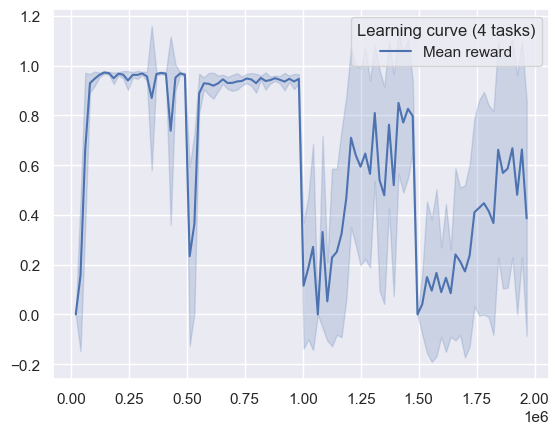

In [97]:
sns.set()
x = df_mean.step
mean_arr = np.array(df_mean.value)
std_arr = np.array(df_std.value)
min_arr = np.array(df_min.value)
max_arr = np.array(df_max.value)


plt.plot(x, mean_arr, 'b-', label='Mean reward')
plt.fill_between(x, mean_arr - std_arr, mean_arr + std_arr, color='b', alpha=0.2)


plt.legend(title='Learning curve (4 tasks)')
plt.show()

In [70]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [73]:
df_mean.step

384      20480
385      40960
386      61440
387      81920
388     102400
        ...   
475    1884160
476    1904640
477    1925120
478    1945600
479    1966080
Name: step, Length: 96, dtype: int64

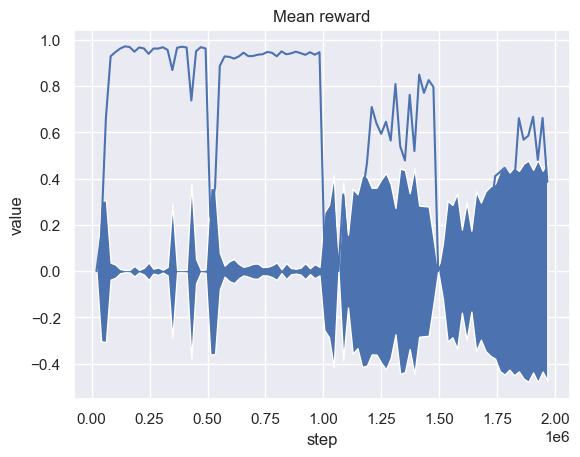

In [74]:
ax = sns.lineplot(data=df_mean, x='step', y='value')
ax.set(title='Mean reward')
ax.fill_between(df_mean.step, -std_arr, std_arr)

In [27]:

def plot_vanilla(data_list, min_len):

    sns.set_style("whitegrid", {'axes.grid' : True,
                                'axes.edgecolor':'black'

                                })
    fig = plt.figure()
    plt.clf()
    ax = fig.gca()
    colors = ["red", "black", "green", "blue", "purple",  "darkcyan", "brown", "darkblue",]
    labels = ["DQN", "DDQN","Maxmin", "EnsembleDQN", "MaxminDQN"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.tsplot(time=range(min_len), data=data, color=color, ci=95)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes $(\\times10^6)$', fontsize=22)
    plt.ylabel('Average return', fontsize=22)
    lgd=plt.legend(frameon=True, fancybox=True, prop={'weight':'bold', 'size':14}, handles=color_patch, loc="best")
    plt.title('Title', fontsize=14)
    ax = plt.gca()
    ax.set_xticks([10, 20, 30, 40, 50])
    ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

In [ ]:
min_len = 2e6
data_list = []
